# Market Basket Analysis with Apriori

By: Gunawan Lumban Gaol, Mike Bratanata

In [250]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [251]:
retail = pd.read_csv('Exercise/retail.csv')

In [252]:
retail.head()

,order_id,product_id,product_name
0,1,49302,Bulgarian Yogurt
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,10246,Organic Celery Hearts
3,1,49683,Cucumber Kirby
4,1,43633,Lightly Smoked Sardines in Olive Oil


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

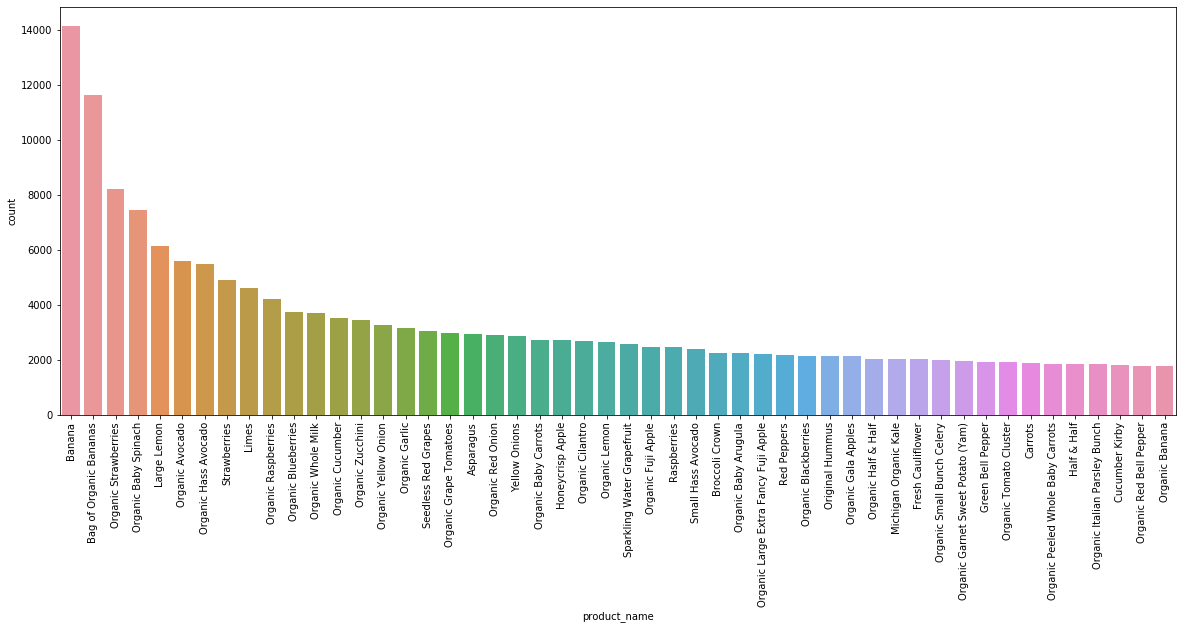

In [253]:
plt.figure(figsize=(20,7.5))
sns.countplot(x = 'product_name', data = retail, order = retail['product_name'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)

### Pick Top 50 from the chart above due to the original dataset is too big

In [254]:
product_50 = retail['product_name'].value_counts().nlargest(50).index

In [255]:
product_50.tolist()

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Large Lemon',
 'Organic Avocado',
 'Organic Hass Avocado',
 'Strawberries',
 'Limes',
 'Organic Raspberries',
 'Organic Blueberries',
 'Organic Whole Milk',
 'Organic Cucumber',
 'Organic Zucchini',
 'Organic Yellow Onion',
 'Organic Garlic',
 'Seedless Red Grapes',
 'Organic Grape Tomatoes',
 'Asparagus',
 'Organic Red Onion',
 'Yellow Onions',
 'Organic Baby Carrots',
 'Honeycrisp Apple',
 'Organic Cilantro',
 'Organic Lemon',
 'Sparkling Water Grapefruit',
 'Organic Fuji Apple',
 'Raspberries',
 'Small Hass Avocado',
 'Broccoli Crown',
 'Organic Baby Arugula',
 'Organic Large Extra Fancy Fuji Apple',
 'Red Peppers',
 'Organic Blackberries',
 'Original Hummus',
 'Organic Gala Apples',
 'Organic Half & Half',
 'Michigan Organic Kale',
 'Fresh Cauliflower',
 'Organic Small Bunch Celery',
 'Organic Garnet Sweet Potato (Yam)',
 'Green Bell Pepper',
 'Organic Tomato Cluster',
 'Carrots',
 'Organic Pe

In [256]:
retail_fin = retail.loc[retail['product_name'].isin(product_50)]

In [257]:
retail_fin['product_name'].value_counts()

Banana                                  14136
Bag of Organic Bananas                  11639
Organic Strawberries                     8233
Organic Baby Spinach                     7443
Large Lemon                              6148
Organic Avocado                          5606
Organic Hass Avocado                     5489
Strawberries                             4920
Limes                                    4609
Organic Raspberries                      4200
Organic Blueberries                      3744
Organic Whole Milk                       3719
Organic Cucumber                         3511
Organic Zucchini                         3465
Organic Yellow Onion                     3255
Organic Garlic                           3150
Seedless Red Grapes                      3058
Organic Grape Tomatoes                   2982
Asparagus                                2940
Organic Red Onion                        2903
Yellow Onions                            2872
Organic Baby Carrots              

In [258]:
retail_fin.shape

(170623, 3)

In [259]:
df = retail_fin.groupby(['order_id','product_name']).size().reset_index(name='count')
basket = (df.groupby(['order_id', 'product_name'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [260]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.drop(['leverage', 'conviction'], inplace = True, axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
41,(Organic Fuji Apple),(Banana),0.039889,0.227369,0.014846,0.372177,1.636886
29,(Honeycrisp Apple),(Banana),0.043685,0.227369,0.014975,0.342784,1.507607
12,(Organic Large Extra Fancy Fuji Apple),(Bag of Organic Bananas),0.035434,0.187206,0.011951,0.337267,1.801580
10,(Organic Hass Avocado),(Bag of Organic Bananas),0.088287,0.187206,0.028952,0.327929,1.751695
16,(Organic Raspberries),(Bag of Organic Bananas),0.067555,0.187206,0.021778,0.322381,1.722061
...,...,...,...,...,...,...,...
26,(Banana),(Broccoli Crown),0.227369,0.036238,0.011307,0.049731,1.372342
42,(Banana),(Organic Grape Tomatoes),0.227369,0.047964,0.011034,0.048529,1.011777
48,(Banana),(Organic Zucchini),0.227369,0.055732,0.010809,0.047538,0.852971
54,(Banana),(Small Hass Avocado),0.227369,0.038345,0.010664,0.046902,1.223138
